In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [3]:
iris, iris_info = tfds.load('iris', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling iris-train.tfrecord...:   0%|          | 0/150 [00:00<?, ? examples/s]

Dataset iris downloaded and prepared to C:\Users\james\tensorflow_datasets\iris\2.0.0. Subsequent calls will reuse this data.


In [4]:
iris

{Split('train'): <PrefetchDataset shapes: {features: (4,), label: ()}, types: {features: tf.float32, label: tf.int64}>}

In [5]:
tf.random.set_seed(1)
ds_orig = iris['train']

In [6]:
# the dataset is not split into train and test
# partition then shuffle only once to prevent mixing of train and test sets
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration = False)
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

In [7]:
# convert the dictionary into a tuple using map()
ds_train_orig = ds_train_orig.map(lambda x:(x['features'],x['label']))
ds_test = ds_test.map(lambda x:(x['features'], x['label']))

In [8]:
iris_model = tf.keras.Sequential([tf.keras.layers.Dense(
    16,activation='sigmoid', name='fc1',input_shape=(4,)),
                                tf.keras.layers.Dense(3,name='fc2',
                                                     activation='softmax')])

In [9]:
iris_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [10]:
iris_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [11]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)
ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size = batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)
history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, verbose=0)

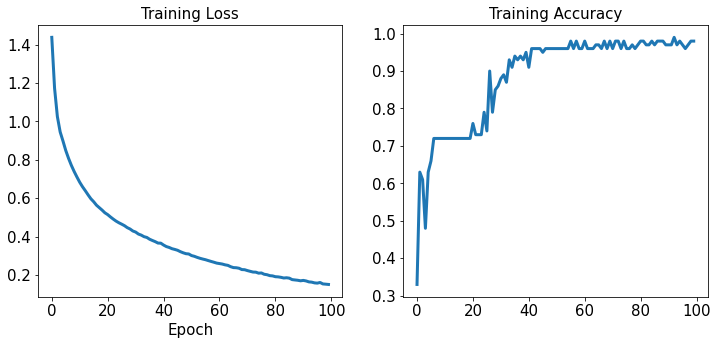

In [13]:
hist = history.history
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)
ax.plot(hist['loss'],lw=3)
ax.set_title('Training Loss', size = 15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax=fig.add_subplot(1,2,2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training Accuracy', size=15)
ax.tick_params(axis='both',which='major', labelsize=15)
plt.show()

In [14]:
iris_model.save('iris-classifier.h5', overwrite = True,
               include_optimizer = True,
               save_format='h5')

In [15]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

In [16]:
iris_model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
results = iris_model_new.evaluate(ds_test.batch(33), verbose=0)
print('Test loss: {:.4f} Test Acc.:{:.4f}'.format(*results))

Test loss: 0.1483 Test Acc.:0.9800
